In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.figure as figure 

from warnings import filterwarnings
filterwarnings('ignore')

import re


import nltk
nltk.download('punkt')
nltk.download('stopwords')

In [4]:
df=pd.read_csv('final_data.csv')
df

,Unnamed: 0,state_name_x,name_of_city,description of the city_x
0,0,PUNJAB,Abohar,Abohar was founded in the 12th century and alo...
1,1,MAHARASHTRA,Achalpur,Achalpur or Ellichpur is first mentioned authe...
2,2,ANDHRA PRADESH,Adilabad,Adilabad derives its name from the erstwhile r...
3,3,JHARKHAND,Adityapur,"Adityapur is a city and suburb in Jamshedpur, ..."
4,4,ANDHRA PRADESH,Adoni,Adoni is situated upon three mountains which a...
...,...,...,...,...
459,459,ANDHRA PRADESH,Vizianagaram,Vizianagaram is a city in the Indian state of ...
460,460,ANDHRA PRADESH,Warangal,"one of the best heritage cities of India, Wara..."
461,461,MAHARASHTRA,Wardha,Wardha was first under the captivation of the ...
462,462,HARYANA,Yamunanagar,This city was part of Ambala district before ...


In [5]:
df_1=df.copy()

In [6]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.columns

Index(['state_name_x', 'name_of_city', 'description of the city_x'], dtype='object')

In [8]:
df.rename(columns={'state_name_x':'state'},inplace=True)

In [9]:
df.rename(columns={'name_of_city':'city'},inplace=True)

In [10]:
df.isnull().sum()

state                         2
city                          0
description of the city_x    11
dtype: int64

In [11]:
df.shape

(464, 3)

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.shape

(451, 3)

In [14]:
df_1.shape

(464, 4)

In [15]:
df[df.duplicated()]

,state,city,description of the city_x
35,BIHAR,Aurangabad,"Aurangabad is sometimes called the ""Chittorgar..."
36,BIHAR,Aurangabad,"Aurangabad is sometimes called the ""Chittorgar..."
37,BIHAR,Aurangabad,"Aurangabad is sometimes called the ""Chittorgar..."
39,MAHARASHTRA,Aurangabad,"The city, originally known as Khadki, was foun..."
40,MAHARASHTRA,Aurangabad,"The city, originally known as Khadki, was foun..."
41,MAHARASHTRA,Aurangabad,"The city, originally known as Khadki, was foun..."


In [16]:
df['state']=df['state'].str.lower()

In [17]:
df['city']=df['city'].str.lower()

In [18]:
df['city']=df['city'].str.replace(' ','')

In [19]:
#df['city']=df['city'].str.strip()

In [20]:
df.rename(columns={'description of the city_x':'description'},inplace=True)

In [21]:
df

,state,city,description
0,punjab,abohar,Abohar was founded in the 12th century and alo...
1,maharashtra,achalpur,Achalpur or Ellichpur is first mentioned authe...
2,andhra pradesh,adilabad,Adilabad derives its name from the erstwhile r...
3,jharkhand,adityapur,"Adityapur is a city and suburb in Jamshedpur, ..."
4,andhra pradesh,adoni,Adoni is situated upon three mountains which a...
...,...,...,...
459,andhra pradesh,vizianagaram,Vizianagaram is a city in the Indian state of ...
460,andhra pradesh,warangal,"one of the best heritage cities of India, Wara..."
461,maharashtra,wardha,Wardha was first under the captivation of the ...
462,haryana,yamunanagar,This city was part of Ambala district before ...


In [22]:
df['description']=df['description'].str.lower()

In [23]:
df['tag']=df['state']+' '+df['description']

In [24]:
df_2=df.copy()

In [25]:
df.drop(['state','description'],axis=1,inplace=True)

In [26]:
df.reset_index(drop=True,inplace=True)

## tokenization...

In [27]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

data=df['tag'][0]
data=word_tokenize(data)
len(data)

165

In [31]:
stop_word=set(stopwords.words('english'))
stop_word

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [32]:
l=[]
for i in data:
    if i in stop_word:
        l.append(i)
        #print(i)
print(len(l))
print(len(data))


70
165


## count vectorization....

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000,stop_words='english')

In [34]:
vector=cv.fit_transform(df['tag']).toarray()
vector

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
type(cv.fit_transform(df_2['tag']))

scipy.sparse.csr.csr_matrix

In [36]:
cv.get_feature_names()

['000',
 '10',
 '100',
 '10th',
 '11',
 '12',
 '12th',
 '13',
 '13th',
 '14',
 '14th',
 '15',
 '15th',
 '16',
 '16th',
 '17',
 '1707',
 '17th',
 '18',
 '1801',
 '1857',
 '18th',
 '19',
 '1947',
 '1948',
 '1956',
 '19th',
 '1st',
 '20',
 '2011',
 '22',
 '24',
 '29',
 '30',
 '45',
 '4th',
 '500',
 '5th',
 '60',
 '6th',
 '70',
 '7th',
 'according',
 'activities',
 'ad',
 'administration',
 'administrative',
 'affiliated',
 'afghan',
 'age',
 'agglomeration',
 'agra',
 'agricultural',
 'ahmedabad',
 'air',
 'airport',
 'ajanta',
 'akbar',
 'akola',
 'ali',
 'aligarh',
 'allahabad',
 'alwar',
 'amazing',
 'ambur',
 'amravati',
 'anand',
 'anantapur',
 'ancient',
 'andhra',
 'anga',
 'annexed',
 'apart',
 'approximately',
 'april',
 'arabian',
 'archaeological',
 'arches',
 'architectural',
 'architecture',
 'area',
 'areas',
 'army',
 'art',
 'ashoka',
 'ashoknagar',
 'ashram',
 'asia',
 'assam',
 'associated',
 'attraction',
 'attractions',
 'attracts',
 'aurangabad',
 'aurangzeb',
 'autho

## word stemming....

In [37]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [38]:
def stem(x):
    l=[]
    for i in x.split():
        l.append(ps.stem(i))
    return ' '.join(l)

In [39]:
df['tag'][0]

'punjab abohar was\xa0founded in the 12th century\xa0and along with the name of the city, there were a lot of changes that took place. it lies close to the india-pakistan border and hence has mixed inhabitants of different castes and creed. the locals, nonetheless, live in complete peace and harmony. abohar is an ancient city in the state of punjab. it lies near the borders of rajasthan and haryana. it was known by the name of \x91aabha nagri\x92 many years back, and was a fabulous city. however, it is said that the panj peers (five saints of multan) destroyed the famous city, the ruins of which can still be seen. since it is an ancient region, visitors from all over come to see the various structures of historical significance that are located in the city. it is also a famous place of pilgrimage for all religions.'

In [40]:
stem('punjab abohar was\xa0founded in the 12th century\xa0and along with the name of the city, there were a lot of changes that took place. it lies close to the india-pakistan border and hence has mixed inhabitants of different castes and creed. the locals, nonetheless, live in complete peace and harmony. abohar is an ancient city in the state of punjab. it lies near the borders of rajasthan and haryana. it was known by the name of \x91aabha nagri\x92 many years back, and was a fabulous city. however, it is said that the panj peers (five saints of multan) destroyed the famous city, the ruins of which can still be seen. since it is an ancient region, visitors from all over come to see the various structures of historical significance that are located in the city. it is also a famous place of pilgrimage for all religions.')

'punjab abohar wa found in the 12th centuri and along with the name of the city, there were a lot of chang that took place. it lie close to the india-pakistan border and henc ha mix inhabit of differ cast and creed. the locals, nonetheless, live in complet peac and harmony. abohar is an ancient citi in the state of punjab. it lie near the border of rajasthan and haryana. it wa known by the name of \x91aabha nagri\x92 mani year back, and wa a fabul city. however, it is said that the panj peer (five saint of multan) destroy the famou city, the ruin of which can still be seen. sinc it is an ancient region, visitor from all over come to see the variou structur of histor signific that are locat in the city. it is also a famou place of pilgrimag for all religions.'

## cosine similarity...

In [41]:
vector.shape

(451, 1000)

In [42]:
from sklearn.metrics.pairwise import cosine_similarity
similarity=cosine_similarity(vector)
similarity[0]  

## fist place to every 451 places distance......
## 0 indicate the index of the place.....

array([1.        , 0.11111111, 0.01760902, 0.09176629, 0.14770979,
       0.27553869, 0.22928799, 0.32138334, 0.16936196, 0.13617658,
       0.36706517, 0.22975071, 0.26630011, 0.04868645, 0.15851878,
       0.14797909, 0.36885556, 0.43026083, 0.17213259, 0.07504788,
       0.09730673, 0.3017346 , 0.13965945, 0.14887747, 0.37086906,
       0.31646192, 0.10721125, 0.19691976, 0.09730673, 0.13887301,
       0.2506536 , 0.1069045 , 0.11502162, 0.07562486, 0.07562486,
       0.07562486, 0.07562486, 0.37794842, 0.37794842, 0.37794842,
       0.37794842, 0.01873172, 0.15634719, 0.10548193, 0.1319824 ,
       0.26311095, 0.10327956, 0.27240209, 0.12943005, 0.08441538,
       0.27012002, 0.13856406, 0.21565523, 0.05345225, 0.11346173,
       0.37851665, 0.372678  , 0.09901475, 0.07216878, 0.09341987,
       0.06928203, 0.26343422, 0.15558932, 0.06911635, 0.23328474,
       0.04082483, 0.12055926, 0.30559596, 0.19757567, 0.07597372,
       0.11942196, 0.21863776, 0.16439899, 0.10079053, 0.06531

In [43]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(387, 0.49405709107442647),
 (115, 0.4823479806820849),
 (175, 0.47309093090201393),
 (246, 0.47308950810423955),
 (450, 0.44265339599454917)]

In [44]:
def recomd_city(city):
    indexs=df[df['city']==city].index[0]
    dist=similarity[indexs]
    city_list=sorted(list(enumerate(dist)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in city_list:
        print(df.iloc[i[0]].city)

In [45]:
recomd_city('surat')

vadodara
veraval
gandhidham
rajkot
porbandar


In [46]:
df['city'].unique()

array(['abohar', 'achalpur', 'adilabad', 'adityapur', 'adoni', 'agartala',
       'agra', 'ahmedabad', 'ahmednagar', 'aizawl', 'ajmer', 'akbarpur',
       'akola', 'alandur', 'alappuzha', 'aligarh', 'allahabad', 'alwar',
       'ambala', 'ambarnath', 'ambattur', 'ambikapur', 'ambur',
       'amravati', 'amreli', 'amritsar', 'amroha', 'anand', 'anantapur',
       'anantnag', 'arrah', 'asansol', 'ashoknagarkalyangarh',
       'aurangabad', 'avadi', 'azamgarh', 'badlapur', 'bagaha',
       'bagalkot', 'bahadurgarh', 'bahraich', 'baidyabati',
       'baleshwartown', 'ballia', 'balurghat', 'banda', 'bankura',
       'bansberia', 'banswara', 'baran', 'baranagar', 'barasat', 'baraut',
       'barddhaman', 'bareilly', 'baripadatown', 'barnala', 'barshi',
       'basirhat', 'basti', 'batala', 'bathinda', 'beawar', 'begusarai',
       'belgaum', 'bellary', 'bengaluru', 'bettiah', 'betul', 'bhadrak',
       'bhadravati', 'bhadreswar', 'bhagalpur', 'bhalswajahangirpur',
       'bharatpur', 'bharuc

In [47]:
#df[df['city'].isin(['jamshedpur','giridih','bhalswajahangirpur','osmanabad','achalpur'])]

In [48]:
#a=df[df['city']=='jamshedpur']['tag'][219]
#a

In [49]:

#re.findall('[[\d]]', a)

In [50]:
#df[df['city']=='giridih']['tag'][169]

In [51]:
#df[df['city']=='achalpur']['tag'][1]

## word cloud..

<Figure size 1080x576 with 0 Axes>

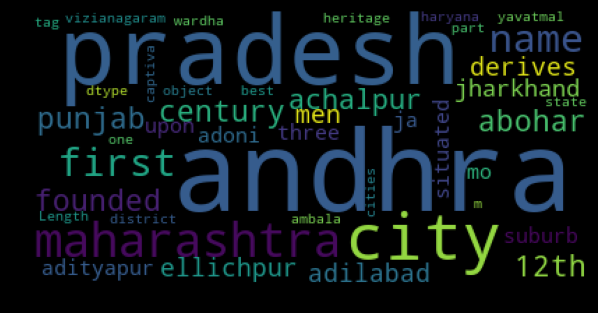

In [52]:
plt.figure(figsize=(15,8))
from wordcloud import WordCloud
wc=WordCloud()
wc.generate(str(df_2['tag']))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(wc)
plt.show()